# IA4 - Hoang Vu (Kingston)

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data prepping

In [145]:
path_to_train_csv = "./mushroom-train.csv"
path_to_val_csv = "./mushroom-val.csv"

In [146]:
trainData = pd.read_csv(path_to_train_csv)
valData = pd.read_csv(path_to_val_csv)

In [147]:
trainData.head()

,cap-face=b,cap-face=c,cap-face=f,cap-face=k,cap-face=s,cap-face=x,cap-surface=f,cap-surface=g,cap-surface=s,cap-surface=y,...,population=v,population=y,habitat=d,habitat=g,habitat=l,habitat=m,habitat=p,habitat=u,habitat=w,class
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


## Decision Tree

In [148]:
class Node():
    """
    Node of decision tree

    Parameters:
    -----------
    prediction: int
        Class prediction at this node
    feature: name
        Name of feature used for splitting on
    split: int
        Categorical value for the threshold to split on for the feature
    left_tree: Node
        Left subtree
    right_tree: Node
        Right subtree
    """
    def __init__(self, prediction, feature, split, left_tree, right_tree):
        self.prediction = prediction
        self.feature = feature
        self.split = split
        self.left_tree = left_tree
        self.right_tree = right_tree



###################

def entropy(target_col):
    """
    This function takes target_col, which is the data column containing the class labels, and returns H(Y).

    """
    target_col_values = target_col.values
    target_col_size = len(target_col_values)
    if target_col_size == 0:
        return 0
    
    odd1 = np.count_nonzero(target_col_values==1)/target_col_size
    odd0 = np.count_nonzero(target_col_values==0)/target_col_size
    
    if (odd1 == 0 or odd0 == 0):
        return 0
    
    return -(odd1*np.log2(odd1) + odd0*np.log2(odd0))


###################

###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    This function calculates the information gain of specified feature. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """
    H_of_Y = entropy(data[target_name])
    subData_1 = data[data[split_attribute_name] == 1]
    subData_0 = data[data[split_attribute_name] == 0]
    odd_subData_1 = len(subData_1.index) / len(data.index)
    odd_subData_0 = len(subData_0.index) / len(data.index)
    H_of_Y_x1 = entropy(subData_1[target_name])
    H_of_Y_x0 = entropy(subData_0[target_name])
    Information_Gain = H_of_Y - (odd_subData_1*H_of_Y_x1 + odd_subData_0*H_of_Y_x0)
    return Information_Gain

###################

###################

def GetMajority(data):
    subData_1 = data[data['class'] == 1]
    subData_0 = data[data['class'] == 0]
    majority = 1 if len(subData_1.index) >= len(subData_0.index) else 0
    return majority

def All1(data):
    subData_1 = data[data['class'] == 1]
    return len(subData_1.index) == len(data.index)

def All0(data):
    subData_0 = data[data['class'] == 0]
    return len(subData_0.index) == len(data.index)


def DecisionTree(data,features,target_attribute_name, depth, maxdepth):
    #print("at depth: ", depth)
    """
    This function takes following paramters:
    1. data = the data for which the decision tree building algorithm should be run --> In the first run this equals the total dataset

    2. features = the feature space of the dataset . This is needed for the recursive call since during the tree growing process
    we have to remove features from our dataset once we have splitted on a feature

    3. target_attribute_name = the name of the target attribute
    4. depth = the current depth of the node in the tree --- this is needed to remember where you are in the overall tree
    5. maxdepth =  the stopping condition for growing the tree

    """
    #First of all, define the stopping criteria here are some, depending on how you implement your code, there maybe more corner cases to consider
    """
    1. If max depth is met, return a leaf node labeled with majority class, additionally
    2. If all target_values have the same value (pure), return a leaf node labeled with majority class 
    3. If the remaining feature space is empty, return a leaf node labeled with majority class
    """
    ######################
    #Filling in this part#
    ######################
    if (depth == maxdepth):
        return Node(
            prediction = GetMajority(data), 
            feature = "", 
            split = -1,
            left_tree = None, 
            right_tree = None
        )
    
    if (All1(data)):
        return Node(
            prediction = GetMajority(data), 
            feature = "", 
            split = -1,
            left_tree = None, 
            right_tree = None
        )
    
    if (All0(data)):
        return Node(
            prediction = GetMajority(data), 
            feature = "", 
            split = -1,
            left_tree = None, 
            right_tree = None
        )
    
    if (len(features.columns) == 0):
        return Node(
            prediction = GetMajority(data), 
            feature = "", 
            split = -1,
            left_tree = None, 
            right_tree = None
        )

    #If none of the above holds true, grow the tree!
    #First, select the feature which best splits the dataset
    
    MaxInfoGain = -1
    SplitFeatureName = ""
    for featureName in features.columns.values:
        currentGain = InfoGain(data,featureName, target_attribute_name)
        if MaxInfoGain < currentGain:
            MaxInfoGain = currentGain
            SplitFeatureName = featureName
    #Once best split is decided, do the following: 
    """
    1. create a node to store the selected feature 
    2. remove the selected feature from further consideration
    3. split the training data into the left and right branches and grow the left and right branch by making appropriate cursive calls
    4. return the completed node
    """
    
    LeftTree = DecisionTree(
        data[data[SplitFeatureName] == 1],
        features[features.columns.drop(SplitFeatureName)],
        "class", 
        depth + 1, 
        maxdepth
    )
    
    RightTree = DecisionTree(
        data[data[SplitFeatureName] == 0],
        features[features.columns.drop(SplitFeatureName)],
        "class", 
        depth + 1, 
        maxdepth
    )
    
    return Node(
        prediction = GetMajority(data), 
        feature = SplitFeatureName, 
        split = 0.5,
        left_tree = LeftTree, 
        right_tree = RightTree
    )

###################

###################




def predict(example,tree,default = 1):
    """
    This function handles making prediction for an example, takes two parameters:
    1. The example

    2. The tree, which is a node
    This needs to be done in a recursive manner. First check if the node is a leaf, if so, return the prediction of the node. Otherwise, send the example down the appropriate subbranch with recursive call.
    """
    if (tree.feature == ""):
        return tree.prediction
    elif (example[tree.feature] >= tree.split):
        return predict(example,tree.left_tree)
    elif (example[tree.feature] < tree.split):
        return predict(example,tree.right_tree)
    else:
        return default



## Part 1: Decision Tree

For this part of the assignment, you will experiment with your implemented algorithm with different
maximum depth and observe its performance on training and validation data. Specifically, apply your
implemented algorithm to learn from the training data with dmax ∈ [1, 10]. In your report, please answer
the following questions.


In [149]:
featureData = trainData.drop(['class'], axis = 1)

TreeDepth1 = DecisionTree(trainData, featureData, 'class', 0, 1)

In [150]:
TreeDepth2 = DecisionTree(trainData, featureData, 'class', 0, 2)

In [151]:
TreeDepth3 = DecisionTree(trainData, featureData, 'class', 0, 3)

In [152]:
TreeDepth4 = DecisionTree(trainData, featureData, 'class', 0, 4)

In [153]:
TreeDepth5 = DecisionTree(trainData, featureData, 'class', 0, 5)

In [154]:
TreeDepth6 = DecisionTree(trainData, featureData, 'class', 0, 6)

In [155]:
TreeDepth7 = DecisionTree(trainData, featureData, 'class', 0, 7)

In [156]:
TreeDepth8 = DecisionTree(trainData, featureData, 'class', 0, 8)

In [157]:
TreeDepth9 = DecisionTree(trainData, featureData, 'class', 0, 9)

In [158]:
TreeDepth10 = DecisionTree(trainData, featureData, 'class', 0, 10)

#### (a) What are the first three splits selected by your algorithm? This is for the root, and the two splitsimmediately beneath the root. What are their respective information gains?


In [160]:
TreeDepth2.feature

'odor=n'

In [161]:
TreeDepth2.left_tree.feature

'spore-print-color=r'

In [162]:
TreeDepth2.right_tree.feature

'bruises?=f'

The three first splits are:
1. odor = n
2. spore-print-color=r
3. bruises?=f

#### (b) Evaluate and plot the training and validation accuracies of your trees as a function of dmax ranging from 1 to 10. At which depth does the train accuracy reaches to 100%? If your tree could not get to 100% before the depth of 10, keep on extending the tree in depth until it reaches 100% for the train accuracy. Do you observe any overfitting?


In [196]:
def getAccuracy(tree, dataset):
    predictions = []
    for row in range(0, dataset.shape[0]):
        predictions.append(predict(dataset.loc[row],tree) - dataset.loc[row]['class'])
    return 1 - (np.count_nonzero(predictions)/len(predictions))

In [202]:
trainAcc1 = getAccuracy(TreeDepth1, trainData)
trainAcc2 = getAccuracy(TreeDepth2, trainData)
trainAcc3 = getAccuracy(TreeDepth3, trainData)
trainAcc4 = getAccuracy(TreeDepth4, trainData)
trainAcc5 = getAccuracy(TreeDepth5, trainData)
trainAcc6 = getAccuracy(TreeDepth6, trainData)
trainAcc7 = getAccuracy(TreeDepth7, trainData)
trainAcc8 = getAccuracy(TreeDepth8, trainData)
trainAcc9 = getAccuracy(TreeDepth9, trainData)
trainAcc10 = getAccuracy(TreeDepth10, trainData)

valAcc1 = getAccuracy(TreeDepth1, valData)
valAcc2 = getAccuracy(TreeDepth2, valData)
valAcc3 = getAccuracy(TreeDepth3, valData)
valAcc4 = getAccuracy(TreeDepth4, valData)
valAcc5 = getAccuracy(TreeDepth5, valData)
valAcc6 = getAccuracy(TreeDepth6, valData)
valAcc7 = getAccuracy(TreeDepth7, valData)
valAcc8 = getAccuracy(TreeDepth8, valData)
valAcc9 = getAccuracy(TreeDepth9, valData)
valAcc10 = getAccuracy(TreeDepth10, valData)

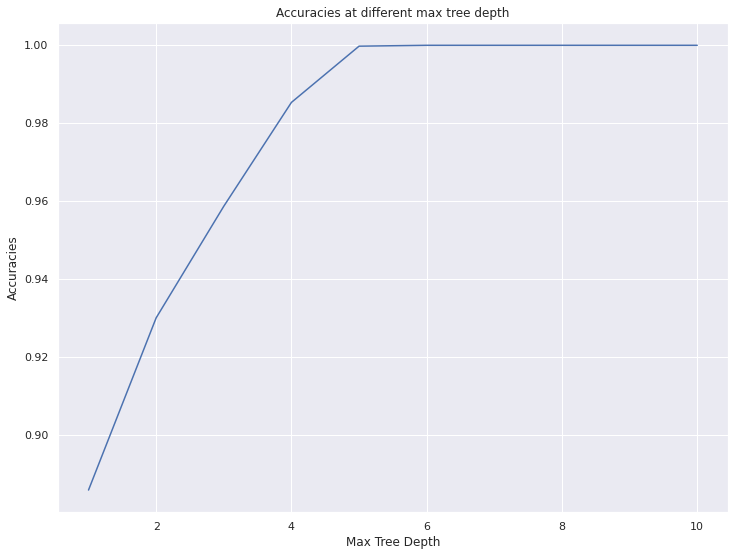

In [204]:
plt.subplots(figsize=(12, 9))
plt.title("Accuracies at different max tree depth")
xaxis = np.array(range(1,11))
accuracies = np.array([
    trainAcc1,
    trainAcc2,
    trainAcc3,
    trainAcc4,
    trainAcc5,
    trainAcc6,
    trainAcc7,
    trainAcc8,
    trainAcc9,
    trainAcc10
])
ax = sns.lineplot(x = xaxis, y = accuracies)

ax.set(xlabel='Max Tree Depth', ylabel='Accuracies')
plt.show()

In [195]:
a